In [1]:
import pandas as pd
import numpy as np
import timeit
import datetime as dt

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
#import plotly.graph_objs as go
%matplotlib inline

In [2]:
from pandas_datareader import data as pdr

In [3]:
days_to_extract = 1000
days_to_forecast = 20

In [4]:
date_end = dt.date.today()
date_start = date_end - dt.timedelta(days_to_extract)

In [5]:
date_end, date_start

(datetime.date(2020, 11, 8), datetime.date(2018, 2, 12))

In [6]:
df = pdr.DataReader("VUSA.L", 'yahoo', date_start, date_end).reset_index()

df = df.loc[df['Date'].notnull()]

In [8]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2018-02-12,36.480000,36.160000,36.270000,36.360001,473018.0,35.182911
1,2018-02-13,36.340000,36.080002,36.290001,36.209999,431664.0,35.037766
2,2018-02-14,36.730000,36.250000,36.650002,36.450001,174445.0,35.269993
3,2018-02-15,36.830002,36.439999,36.689999,36.580002,566197.0,35.395790
4,2018-02-16,37.139999,36.900002,36.910000,37.110001,369572.0,35.908634


In [9]:
df.dtypes

Date         datetime64[ns]
High                float64
Low                 float64
Open                float64
Close               float64
Volume              float64
Adj Close           float64
dtype: object

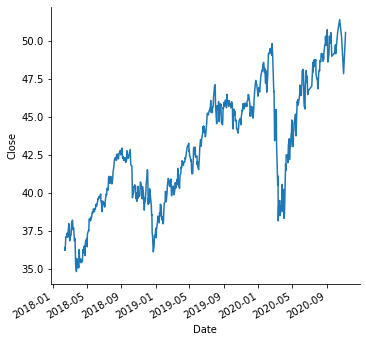

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.relplot(x='Date', y='Close', kind='line', data=df).fig.autofmt_xdate()

# preprocessing

In [11]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()
scaler = MinMaxScaler(feature_range=(0, 1))
le = preprocessing.LabelEncoder()

In [12]:
df['Date encoded'] = le.fit_transform(df['Date'])

In [13]:
days_cutoff = len(df) - days_to_forecast

In [14]:
scaled_Close = scaler.fit_transform(df[['Close']])

In [15]:
scaled_Close = np.squeeze(scaled_Close)

In [16]:
df.values[days_cutoff:, 7]

array([632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644,
       645, 646, 647, 648, 649, 650, 651], dtype=object)

In [17]:
x_train, y_train = df.values[:days_cutoff, 7], scaled_Close[:days_cutoff]
x_test, y_test = df.values[days_cutoff:, 7], scaled_Close[days_cutoff:]

x_train, y_train = df.values[:600, 0], scaled_Close[:600]
x_test, y_test = df.values[600:, 0], scaled_Close[600:]

In [18]:
x_train.shape, x_test.shape

((632,), (20,))

# split train data

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=.2)


## statsmodels

In [20]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Date encoded
0,2018-02-12,36.480000,36.160000,36.270000,36.360001,473018.0,35.182911,0
1,2018-02-13,36.340000,36.080002,36.290001,36.209999,431664.0,35.037766,1
2,2018-02-14,36.730000,36.250000,36.650002,36.450001,174445.0,35.269993,2
3,2018-02-15,36.830002,36.439999,36.689999,36.580002,566197.0,35.395790,3
4,2018-02-16,37.139999,36.900002,36.910000,37.110001,369572.0,35.908634,4


In [21]:
data = df.set_index('Date')

<AxesSubplot:xlabel='Date'>

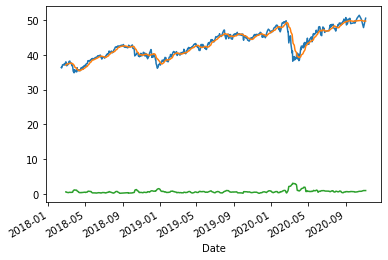

In [22]:
data.Close.plot()
data.Close.rolling(12).mean().plot(label= '12 month rolling mean')
data.Close.rolling(12).std().plot(label='12 month rolling std')

In [23]:
#import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

import plotly.graph_objects as go

In [24]:
decomposition = seasonal_decompose(data.Close, model='multiplicative', period=100)

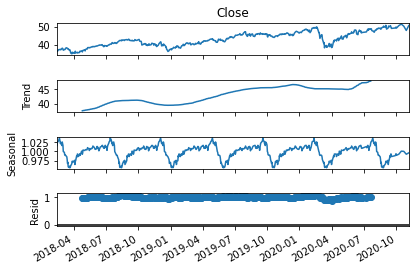

In [25]:
decomposition.plot().autofmt_xdate()

<AxesSubplot:xlabel='Date'>

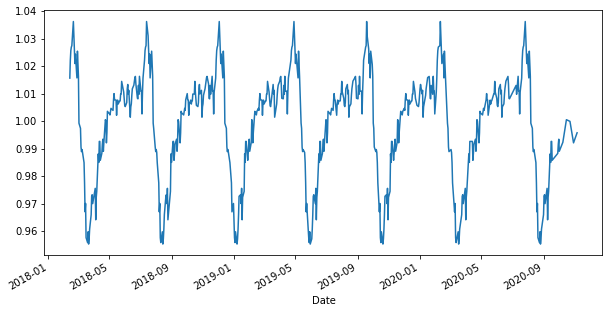

In [26]:
plt.figure(figsize=(10, 5))
decomposition.seasonal.plot()
#plt.plot(decomposition.seasonal)

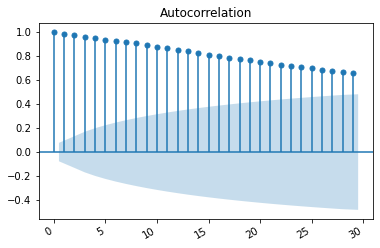

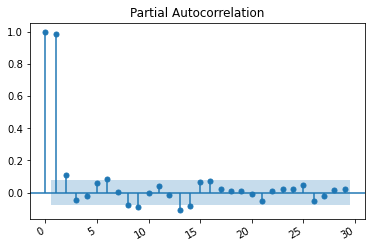

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data.Close).autofmt_xdate()
plot_pacf(data.Close).autofmt_xdate()